In [10]:
import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df = pd.read_csv("FakeNewsNet.csv")

In [12]:
df.head()

,title,news_url,source_domain,tweet_num,real
0,Kandi Burruss Explodes Over Rape Accusation on...,http://toofab.com/2017/05/08/real-housewives-a...,toofab.com,42,1
1,People's Choice Awards 2018: The best red carp...,https://www.today.com/style/see-people-s-choic...,www.today.com,0,1
2,Sophia Bush Sends Sweet Birthday Message to 'O...,https://www.etonline.com/news/220806_sophia_bu...,www.etonline.com,63,1
3,Colombian singer Maluma sparks rumours of inap...,https://www.dailymail.co.uk/news/article-33655...,www.dailymail.co.uk,20,1
4,Gossip Girl 10 Years Later: How Upper East Sid...,https://www.zerchoo.com/entertainment/gossip-g...,www.zerchoo.com,38,1


In [13]:
print(df.shape)
print(df.columns)
print(df.isnull().sum())

(23196, 5)
Index(['title', 'news_url', 'source_domain', 'tweet_num', 'real'], dtype='object')
title              0
news_url         330
source_domain    330
tweet_num          0
real               0
dtype: int64


In [14]:
#feature
X = df['title']
y = df['real']

In [15]:
#train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [16]:
#text to num
tfidf = TfidfVectorizer(stop_words='english', max_features = 5000)

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [19]:
#model
svm_model = SVC(kernel='linear', C=1.0)
svm_model.fit(X_train_tfidf, y_train)

SVC(kernel='linear')

In [20]:
y_pred = svm_model.predict(X_test_tfidf)

In [23]:
#model Evaluation
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report: \n",classification_report(y_test, y_pred))

Accuracy: 0.8467672413793104
Classification Report: 
               precision    recall  f1-score   support

           0       0.77      0.55      0.64      1151
           1       0.86      0.95      0.90      3489

    accuracy                           0.85      4640
   macro avg       0.82      0.75      0.77      4640
weighted avg       0.84      0.85      0.84      4640



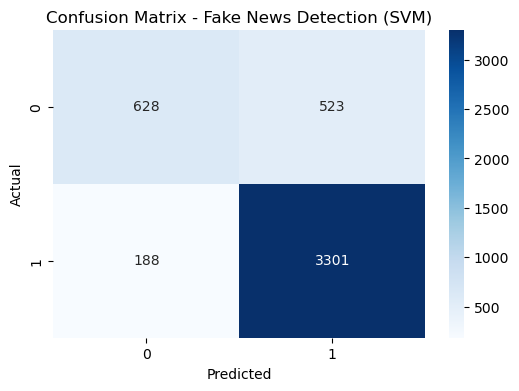

In [24]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Fake News Detection (SVM)")
plt.show()
